In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc

rc("font", **{"family": "Times", "size": 15})
rc("text", usetex=True)

plt.rcParams['figure.dpi'] = 300

with open("preds.pkl", "rb") as file:
    predictions = pickle.load(file)

with open("../data/val.pkl", "rb") as file:
    val = pickle.load(file)

GENRES = np.array(["BLUES", "CLASSICAL", "COUNTRY", "DISCO", "HIP-HOP", "JAZZ", "METAL", "POP", "REGGAE", "ROCK"])
val = np.array(val)

/Users/georgeherbert/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/3s/q0yxg41d3zbf4g4vs33x_b180000gn/T/ipykernel_94614/1618593966.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.array(val)


In [2]:
min_time = 0
max_time = 0.9299319728
min_freq = 0
max_freq = 20000
aspect = (max_time - min_time) / (max_freq - min_freq) * 2
extent = [min_time, max_time, min_freq, max_freq]

def plot_spectrogram(file_name):
    mel = val[val[:, 0] == file_name][0][1][0]
    plt.imshow(
        mel[:, :41],
        cmap="magma",
        origin="lower",
        aspect=aspect,
        extent=extent
    )
    plt.ylabel("Frequency")
    plt.xlabel("Time (s)")
    plt.yticks([])

In [27]:
files = np.array(predictions[2])
unique = np.unique(files)

correct_index = predictions[0] == predictions[1]
incorrect_index = predictions[0] != predictions[1]
correct = files[correct_index]
incorrect = files[incorrect_index]

correct_files, correct_counts = np.unique(correct, return_counts = True)
incorrect_files, incorrect_counts = np.unique(incorrect, return_counts = True)

correct_files_ordered = correct_files[(-correct_counts).argsort()]
incorrect_files_ordered = incorrect_files[(-incorrect_counts).argsort()]

print(correct_files_ordered[:50])
print(correct_counts[(-correct_counts).argsort()][:50], "\n")
print(incorrect_files_ordered[:50])
print(incorrect_counts[(-incorrect_counts).argsort()][:50])

['hiphop.00071.wav' 'classical.00066.wav' 'classical.00070.wav'
 'classical.00074.wav' 'disco.00044.wav' 'classical.00084.wav'
 'classical.00087.wav' 'disco.00099.wav' 'pop.00052.wav'
 'country.00019.wav' 'pop.00000.wav' 'metal.00082.wav' 'jazz.00060.wav'
 'metal.00065.wav' 'metal.00054.wav' 'jazz.00042.wav' 'country.00083.wav'
 'metal.00052.wav' 'metal.00049.wav' 'metal.00047.wav' 'disco.00076.wav'
 'disco.00004.wav' 'metal.00042.wav' 'metal.00036.wav' 'metal.00033.wav'
 'metal.00021.wav' 'disco.00025.wav' 'metal.00020.wav' 'disco.00035.wav'
 'metal.00003.wav' 'metal.00017.wav' 'jazz.00063.wav'
 'classical.00044.wav' 'classical.00075.wav' 'metal.00013.wav'
 'blues.00078.wav' 'blues.00068.wav' 'blues.00062.wav' 'blues.00046.wav'
 'blues.00036.wav' 'blues.00035.wav' 'classical.00030.wav'
 'blues.00028.wav' 'blues.00024.wav' 'blues.00032.wav' 'blues.00020.wav'
 'classical.00013.wav' 'classical.00015.wav' 'blues.00015.wav'
 'classical.00018.wav']
[15 15 15 15 15 15 15 15 15 15 15 15 15 15

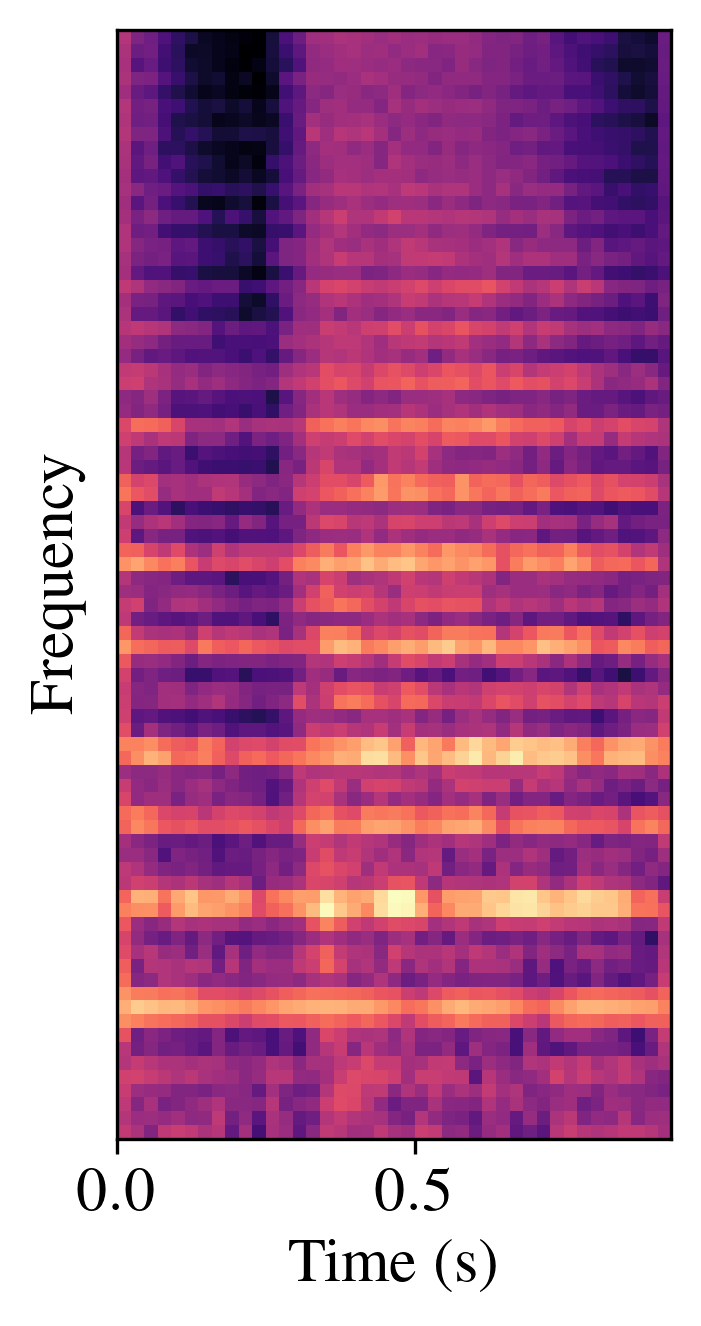

['CLASSICAL' 'CLASSICAL' 'CLASSICAL' 'CLASSICAL' 'CLASSICAL' 'CLASSICAL'
 'CLASSICAL' 'CLASSICAL' 'CLASSICAL' 'CLASSICAL' 'CLASSICAL' 'CLASSICAL'
 'CLASSICAL' 'CLASSICAL' 'CLASSICAL']


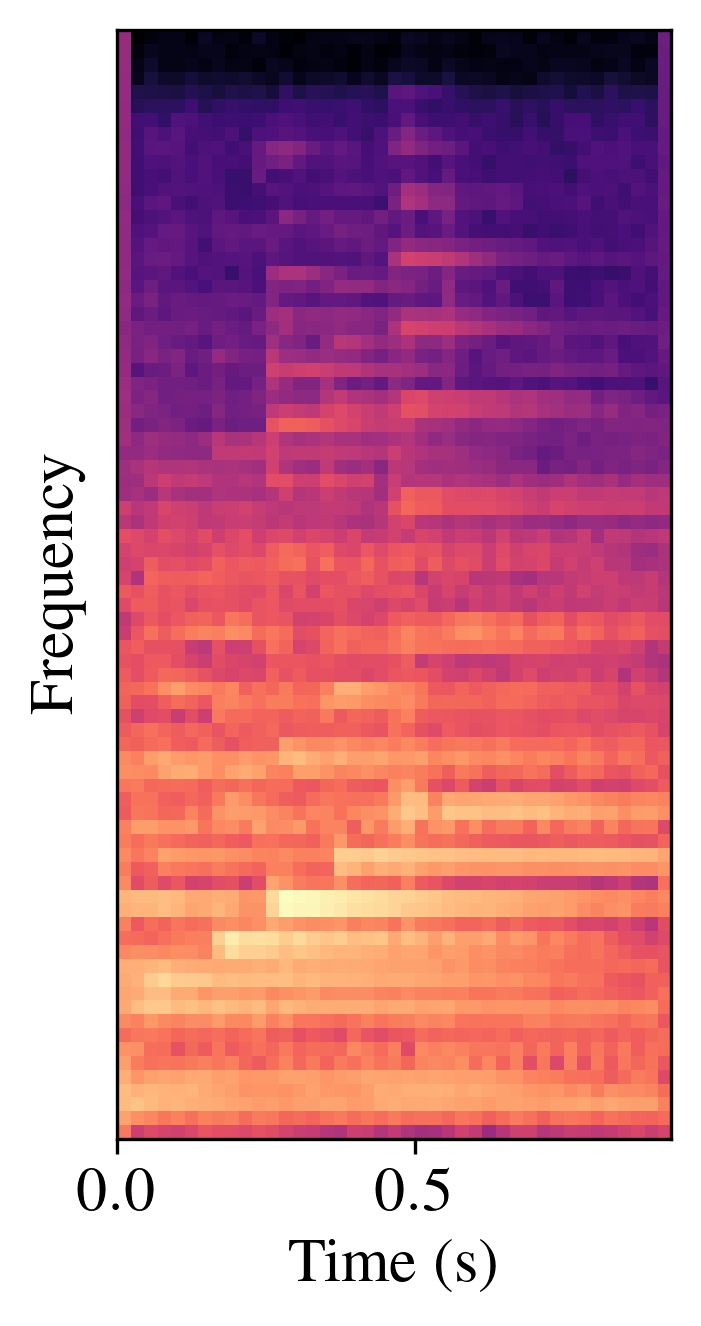

['CLASSICAL' 'CLASSICAL' 'COUNTRY' 'CLASSICAL' 'ROCK' 'BLUES' 'CLASSICAL'
 'COUNTRY' 'COUNTRY' 'CLASSICAL' 'BLUES' 'CLASSICAL' 'CLASSICAL'
 'CLASSICAL' 'CLASSICAL']


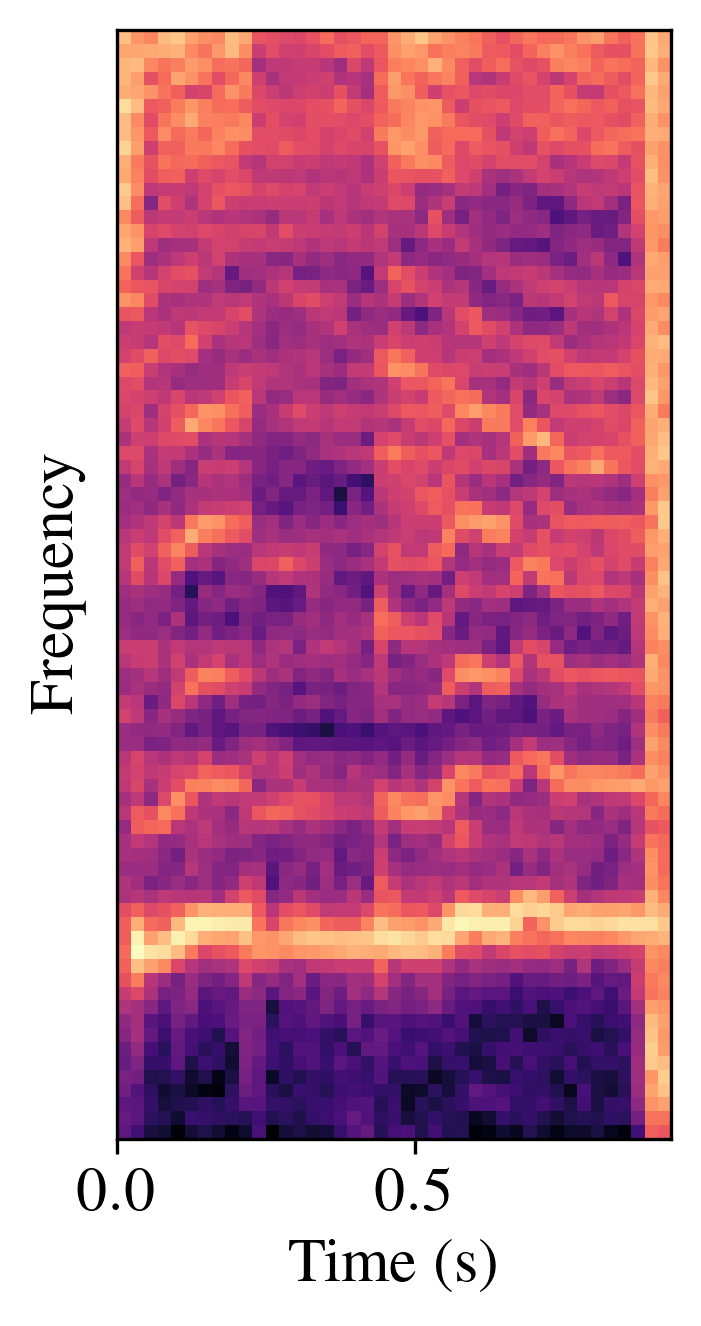

['HIP-HOP' 'DISCO' 'DISCO' 'POP' 'DISCO' 'DISCO' 'DISCO' 'DISCO' 'DISCO'
 'DISCO' 'DISCO' 'HIP-HOP' 'DISCO' 'DISCO' 'DISCO']


In [31]:
correct_file = "classical.00070.wav"
incorrect_file_1 = "jazz.00003.wav"
incorrect_file_2 = "pop.00064.wav"

plot_spectrogram(correct_file)
plt.savefig("../report/images/spec_correct.png", bbox_inches='tight', pad_inches=0.0)
plt.show()
print(GENRES[np.array(predictions[1][files == correct_file], dtype = np.uint)])

plot_spectrogram(incorrect_file_1)
plt.savefig("../report/images/spec_incorrect_1.png", bbox_inches='tight', pad_inches=0.0)
plt.show()
print(GENRES[np.array(predictions[1][files == incorrect_file_1], dtype = np.uint)])

plot_spectrogram(incorrect_file_2)
plt.savefig("../report/images/spec_incorrect_2.png", bbox_inches='tight', pad_inches=0.0)
plt.show()
print(GENRES[np.array(predictions[1][files == incorrect_file_2], dtype = np.uint)])
